# Kollaborationen

Dieses Jupyter Notebook beschäftigt sich mit den Kollaborationen von den Künstlern, die im Datenset erscheinen. Hierbei wird 
Unterteilt ist das Jupyter Notebook in folgende Unterthemen:

- In welchen Genres treten die meisten Kollaborationen auf? 
- Statistische Datenanalyse bezüglich der Kollaborationen
    - allgemein
    - Genres
    - Wer sind die Künstler, die am meisten kollaborieren?
- Knowlegde Graphs einiger Künstler

### Setup
Zu Beginn werden alle wichtigen Pakete importiert und das Datenset hochgeladen.

In [115]:
import pandas as pd
import spacy
import spacy.cli
import plotly
import matplotlib.pyplot as plt
import re
import networkx as nx
import os

In [2]:
df = pd.read_csv('../data/songs_complete_final.csv')

In [4]:
df

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
0,1099,209826,10999,831505,2021-10-29,INTRO (10999),INTRO (10999) by King Khalil,7337100,"Powpow Dicka, das kein Rap mehr, das ist Kind...",2021,Friday,post-rock,Rock,60
1,1099,209826,10999,831505,2021-10-29,GIB IHM,GIB IHM by King Khalil & AK 33,7337102,"Gefährliche, gefährliche KiKiKiKi Gefährliche ...",2021,Friday,post-rock,Rock,92
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80
4,1099,209826,KING KONG,546439,2020-01-31,MOON,MOON by King Khalil & Lil Lano,5109178,. Liquid Swords GZA Actual . souljaboytellem...,2020,Friday,post-rock,Rock,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80
17750,t-low,9229,Tyskie (EP),553779,2019-08-02,Fast,Fast by ​​t-low,4782369,"Kozee, cooke die Sauce Ich bin fast fully tat...",2019,Friday,hip-hop,Rap,98
17751,t-low,9229,Tyskie (EP),553779,2019-08-02,Fliegt,Fliegt by ​​t-low (Ft. Murcy),4784534,"Rope God, youre so anorexic Und sie fliegt ja...",2019,Friday,hip-hop,Rap,90
17752,t-low,9229,Tyskie (EP),553779,2019-08-02,Lonely,Lonely by ​​t-low,4784567,"Sie ist lonely, Ja Sie will nur zu ihrem Homi...",2019,Friday,hip-hop,Rap,60


In [81]:
genre_counts = df['genre'].value_counts().sort_values(ascending=False)
genre_counts

genre
deutschrap      4033
pop             2560
rap             2395
schlager        1343
hip-hop         1271
hip hop         1256
rock             663
indie            632
deutschrock      416
punk rock        390
reggae           264
ambient          222
[]               214
karneval         201
electro          162
deutsch rap      130
instrumental     119
gothic           117
emo              109
cloud rap         69
swing             66
new wave          64
ndw               53
pop rock          53
post-rock         49
party             41
pornorap          27
dubstep           12
metal              5
Name: count, dtype: int64

Anschießend wir ein neuer Dataframe erstellt, bei den man anhand von "Ft" im vollen Titel ermitteln kann, ob es eine Kollaboration ist. Mithilfe von Regex werden dann die einzelnden Kollaborateure gefiltert und anschließend unter der Spalte "collaboration" im Dataframe gespeichert.

In [5]:
df['full_title'].fillna('', inplace=True)

colabs = df[df["full_title"].str.contains("Ft")]

In [6]:
colabs

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80
5,1099,209826,KING KONG,546439,2020-01-31,KILLA,KILLA by King Khalil (Ft. 2Ton),5189159,"Yo, its that boy Denzel Curry Im finna do this...",2020,Friday,post-rock,Rock,57
7,1099,209826,KING KONG,546439,2020-01-31,ALL BLACK,ALL BLACK by King Khalil (Ft. PA Sports),5189160,Yo pls dont call me Im busy at the moment U ma...,2020,Friday,post-rock,Rock,156
9,1099,209826,KING KONG,546439,2020-01-31,BABYLON,BABYLON by King Khalil (Ft. Azad),5189162,"Studio AlbumsThe Rolling Stones , UK Englands...",2020,Friday,post-rock,Rock,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,t-low,9229,Litty Way,618085,2020-03-20,Schuhe Kaputt,Schuhe Kaputt by ​​t-low (Ft. NOK1D),5402535,"Time on the beat SchuSchu Schuhe sind kaputt,...",2020,Friday,hip-hop,Rap,58
17742,t-low,9229,Litty Way,618085,2020-03-20,Besser,Besser by ​​t-low (Ft. BiggO),5402536,"Baller die Scheine in Automaten Ey, meine Kund...",2020,Friday,hip-hop,Rap,80
17744,t-low,9229,Litty Way,618085,2020-03-20,Light It Up,Light It Up by ​​t-low (Ft. NOK1D & Rei Saike),5402538,"Kozee, cooke die Sauce FüFüFünfer für ne Xan,...",2020,Friday,hip-hop,Rap,102
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80


In [7]:
regex = r"\(Ft\. ([^)]+)\)"

# Kollaborateure extrahieren
def extract_collaborators(title):
    start_index = title.find("(Ft.")
    end_index = title.find(")", start_index)
    if start_index != -1 and end_index != -1:
        collaborators = title[start_index+4:end_index].strip()
        return collaborators
    else:
        return ""


colabs['collaboration'] = colabs['full_title'].apply(extract_collaborators)

# Whitespaces entfernen
colabs['collaboration'] = colabs['collaboration'].str.strip()


<ipython-input-7-8a1c0392b24a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colabs['collaboration'] = colabs['full_title'].apply(extract_collaborators)
<ipython-input-7-8a1c0392b24a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colabs['collaboration'] = colabs['collaboration'].str.strip()


In [8]:
colabs

,artist,artist_id,album,album_id,release_date,title,full_title,song_id,lyrics,release_year,weekday,genre,genre_cat,word_count,collaboration
2,1099,209826,KING KONG,546439,2020-01-31,BUNDESWEIT,BUNDESWEIT by King Khalil (Ft. Fler),4532899,Aus meiner Stadt fliegen Leuchtclips und Bresl...,2020,Friday,post-rock,Rock,113,Fler
3,1099,209826,KING KONG,546439,2020-01-31,HOLLANDA,HOLLANDA by King Khalil (Ft. Mert),5189158,Because youre so sweet You lift up my heart An...,2020,Friday,post-rock,Rock,80,Mert
5,1099,209826,KING KONG,546439,2020-01-31,KILLA,KILLA by King Khalil (Ft. 2Ton),5189159,"Yo, its that boy Denzel Curry Im finna do this...",2020,Friday,post-rock,Rock,57,2Ton
7,1099,209826,KING KONG,546439,2020-01-31,ALL BLACK,ALL BLACK by King Khalil (Ft. PA Sports),5189160,Yo pls dont call me Im busy at the moment U ma...,2020,Friday,post-rock,Rock,156,PA Sports
9,1099,209826,KING KONG,546439,2020-01-31,BABYLON,BABYLON by King Khalil (Ft. Azad),5189162,"Studio AlbumsThe Rolling Stones , UK Englands...",2020,Friday,post-rock,Rock,279,Azad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,t-low,9229,Litty Way,618085,2020-03-20,Schuhe Kaputt,Schuhe Kaputt by ​​t-low (Ft. NOK1D),5402535,"Time on the beat SchuSchu Schuhe sind kaputt,...",2020,Friday,hip-hop,Rap,58,NOK1D
17742,t-low,9229,Litty Way,618085,2020-03-20,Besser,Besser by ​​t-low (Ft. BiggO),5402536,"Baller die Scheine in Automaten Ey, meine Kund...",2020,Friday,hip-hop,Rap,80,BiggO
17744,t-low,9229,Litty Way,618085,2020-03-20,Light It Up,Light It Up by ​​t-low (Ft. NOK1D & Rei Saike),5402538,"Kozee, cooke die Sauce FüFüFünfer für ne Xan,...",2020,Friday,hip-hop,Rap,102,NOK1D & Rei Saike
17749,t-low,9229,Tyskie (EP),553779,2019-08-02,40 Nights,40 Nights by ​​t-low (Ft. Sevi Rin),4782294,"MBC Sie will nur Liebe, ich will nur Lean Pud...",2019,Friday,hip-hop,Rap,80,Sevi Rin


### Im welchen Genres treten die meisten Kollaborationen auf? 

Im folgenden Teil wird geschaut, wie sich dei Verteilung der einzelnen Kollaborationen auf Genres ist.

In [9]:
colabs_per_genre = colabs.groupby('genre')['collaboration'].count()
print(colabs_per_genre)


genre
[]                47
ambient           57
cloud rap         10
deutsch rap       29
deutschrap      1101
deutschrock       45
dubstep            2
electro           20
emo               17
hip hop          298
hip-hop          212
indie             17
instrumental       3
karneval           5
new wave           2
party              2
pop               89
pop rock           1
pornorap           9
post-rock         18
punk rock          2
rap              661
reggae            28
rock              40
schlager          22
Name: collaboration, dtype: int64


In [10]:
colabs_per_genre_df = pd.DataFrame(list(colabs_per_genre.items()), columns=["genre", "count"], )

In [11]:
colabs_per_genre_df

,genre,count
0,[],47
1,ambient,57
2,cloud rap,10
3,deutsch rap,29
4,deutschrap,1101
5,deutschrock,45
6,dubstep,2
7,electro,20
8,emo,17
9,hip hop,298


In [104]:
pd.options.plotting.backend = "plotly"

In [98]:
colabs_per_genre_df = colabs_per_genre_df.sort_values(by='count', ascending=False)
colabs_per_genre_fig = colabs_per_genre_df.plot(kind='bar', x='genre', y='count', title='Verteilung der Collaborators nach Genre')

colabs_per_genre_fig.show()
colabs_per_genre_fig.write_html("images\colabs_per_genre_fig.html")

Die Ergebnisse zeigen, dass bestimmte Genres besonders häufig vertreten sind. Beispielsweise sind die Genres "deutschrap" und "rap" mit jewiels 1101 und 661 Kollaborationen 61,32% der Kollaborationen aufweisen, gefolgt von "hip hop" mit insgesamt 510 Kollaborationen. Diese Ergebnisse zeigen, dass Künstler in diesen Genren besonders oft mit anderen Künstlern kollaborieren. En Grudn für diese hohen Werte könnte einerseits aufgrund des Datensets legen, da die Genres "deutschrap" und "rap" insgesamt mehr als 6428 Songs beinhaltet und somit die Wahrscheinlichkeit auf Kollaborationen größer ist als bei den andern Genres. Andererseits könnten die Ergebnisse die Bedutung von Zusammenarbeit in deisen Genren wiederspiegelt. 

Anhand der Ergebnisse kann man außerdem feststellen, dasss es von den insgesamt 2873 Kollaborationen im Datenset nur 3% im Genre "pop" entstanden sind, obwohl das Genre mit 2560 Songs im gesamten Datenset das Dritthöchste ist. Daraus könnte man schließen, dass Zusammenarbeit von Künstlern in diesen Genre nicht so bedeutend ist wie im Vergleich zu Rap oder Hiphop.

### Statistische Analyse der Kollaborationen

In diesen Teil werden anhand von statistischen Metriken wie Median, Maximal- und Minimalwert und die Percentile das Datenset statistisch ausgewertet.

##### Mit wie vielen Künstlern wird durchschnittich kollaboriert?
Um zu ermitteln, wie die Anzahl an Kollaborateueren durchschnittlich ist, muss das Datenset weiter bearbeitet werden. Hierbei werden die Kollaborateure, die unter der Spalrte "collaboration" abgespeichert wurden, in einzelne Künstler aufgeteilt und als eine Liste unter der Spalte "collaboration_split" im Dataframe gespeichert. Zu allerest würde hierbei die Werte für das gesamte Datenset berechnet, anschließend wurde die statistische Analyse auf die einzelnen Genres ausgeführt.

In [24]:
colabs['collaboration_split'] = colabs["collaboration"].str.replace("\xa0", " ").str.split(", | & ")

<ipython-input-24-8c9a166272da>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Allgemein

In [84]:
colabs["collaboration_split"].apply(len).mean()

1.3024712843717368

In [86]:
colabs['collaboration_split'].apply(len).describe()

count    2873.000000
mean        1.302471
std         0.888677
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        28.000000
Name: collaboration_split, dtype: float64

In [18]:
colabs['collaboration_split'].describe()

count             2873
unique            1376
top       [Farid Bang]
freq                44
Name: collaboration_split, dtype: object

##### Genres

In [95]:
colabs['collaboration_split'].apply(len).groupby(colabs["genre"]).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
[],47.0,1.829787,0.962767,1.0,1.00,2.0,2.50,4.0
ambient,57.0,1.526316,1.151168,1.0,1.00,1.0,2.00,8.0
cloud rap,10.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
deutsch rap,29.0,1.379310,0.902924,1.0,1.00,1.0,1.00,4.0
deutschrap,1101.0,1.247956,0.630518,1.0,1.00,1.0,1.00,9.0
deutschrock,45.0,1.688889,1.378771,1.0,1.00,1.0,2.00,5.0
dubstep,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
electro,20.0,1.150000,0.366348,1.0,1.00,1.0,1.00,2.0
emo,17.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [96]:
colabs['collaboration_split'].groupby(colabs["genre"]).describe()

,count,unique,top,freq
genre,,,,
[],47,43,"[Amar, Ercandize, Moe Mitchell]",3
ambient,57,40,[Dr. Surabi],5
cloud rap,10,9,[Tryptamine],2
deutsch rap,29,18,[Farid Bang],4
deutschrap,1101,559,[Farid Bang],26
deutschrock,45,34,"[Faut62, Flex62, Günther Fresh, Obi One, Wena41]",3
dubstep,2,2,[Henning May],1
electro,20,20,[Jörkk Mechenbier],1
emo,17,12,[MC Bomber],3


Wie man anhand der Ergebnisse erkennen kann, wird im Durchnitt mit ungefähr 1.3 Künstlern zusammengearbeitet. Mit einer Standarabweichung 0,89 bedeutet dies, dass relativ betrachtet Künstler im Durchschnitt nur eine Kollaborationspartner haben. Die minimale Anzahl von Kollaborateuren pro Künstler beträgt 1, während die maximale Anzahl bei 28 liegt. Das Minimum an Kollaborateuern liegt bei 1, während die maximale Anzahl bei 28 Künstlern betrifft. Das MAximum kann man hierbei als einen Ausrutscher sehen, da man beim genaueren Betrachten der einzelnden Genres feststellen kann, dass dies nur in einem einzigen Genre erschienen ist.

Diese Ergebnisse deuten darauf hin, dass Kollaborationen im Musikbereich relativ selten vorkommen und die meisten Künstler in der Regel nur mit wenigen anderen Künstlern zusammenarbeiten. Allerdings kann man bei einigen Genres erkennen, wie beispielsweise deutschrap oder hiphop, dass man häufiger miteinander kollaboriert. 

### Wer sind die Künstler, die am meisten Kollaborieren?

In [23]:
colabs['artist'].value_counts().head()

artist
Eko Fresh    112
Sido          98
Fler          95
Azad          84
Kontra K      77
Name: count, dtype: int64

In [21]:
# Collaborationen nach Künstlern gruppieren und Anzahl der Collaborationen zählen
top_10_artists = colabs.groupby('artist')['collaboration'].count().nlargest(10)
print(top_10_artists)

artist
Eko Fresh     112
Sido           98
Fler           95
Azad           84
Kontra K       77
Farid Bang     68
Prinz Pi       66
BHZ            65
Chakuza        65
Kollegah       64
Name: collaboration, dtype: int64


In [130]:
# Collaborationen nach Kollaborateuren gruppieren und Anzahl der Künstler zählen
top_10_collab_artists = colabs.groupby('collaboration')['artist'].count().nlargest(10)
print(top_10_collab_artists)

collaboration
Farid Bang            44
Die Freie Radikale    40
Sido                  34
Summer Cem            29
Bushido               25
Eko Fresh             23
Haftbefehl            22
RAF Camora            22
Bausa                 20
SSIO                  19
Name: artist, dtype: int64


Um herauszufinden, welche Künstler am meisten kollaborieren, wurden zwei unterschiedliche Methoden verwendet. In der ersten Methode wurde geschaut, welche Künstler für die eigenen Lieder am meisteen mit andern Künstlern zusammenarbeiten. Hierbei wurde daher der Fokus auf die Spalte "artist" gelegt und anschließend nach den "collaboration" gruppiert. Man kann anhand der Ergebnisse feststellen, dass Eko Fresh mit mehr als 112 Kollaborationen am meisten mit andern Künstlern kollaboriert, gefolgt von Sido mit 98 Liedern und Fler mit 95 Liedern.

In der zweiten Methode haben wir geschaut, welche Künstler am meisten in den Liedern von anderen Künstlern auftauchen und somit kollaborieren. Der Fokus wurde hierbei auf die Kollaborationen gelebt und danach auf die Künstler. Anhand der Ergebnisse ist festzustellen, dass Farid Bang mit 44 Liedern an meisten in Songs von anderen Künstlern erscheint.

Wenn man die Ergebnisse beider Methoden zusammensetzt, kann man erkennen, dass Eko Fresh mit insgesamt 135 Songs, Sido mit insgesamt 132 Songs und Farid Bang mit insgesamt 112 am meisten mit anderen Künstlern zusammenarbeiten. Alle drei dieser Künstler sind auch im Bereich Deutschrap/Rap/Hip-Hop tätig, wodurch man hierbei auch die Verbindung der Genres bezüglich zu Kollaborationen nochmal gut deuten kann.

### Visualisierungen

Nach der statistischen Analyse wurden die Verbindungen von einigen Künstlern angeschaut. Hierbei liegt der Fokus auf die Top 3 Künstler, die am meisten mit anderen Künstlern für ihre eigenen Lieder kollaboriert haben. Anhand der Graphen kann an außerdem erkenne, wie häufig Künstler miteinander zusammen gearbeitet haben.

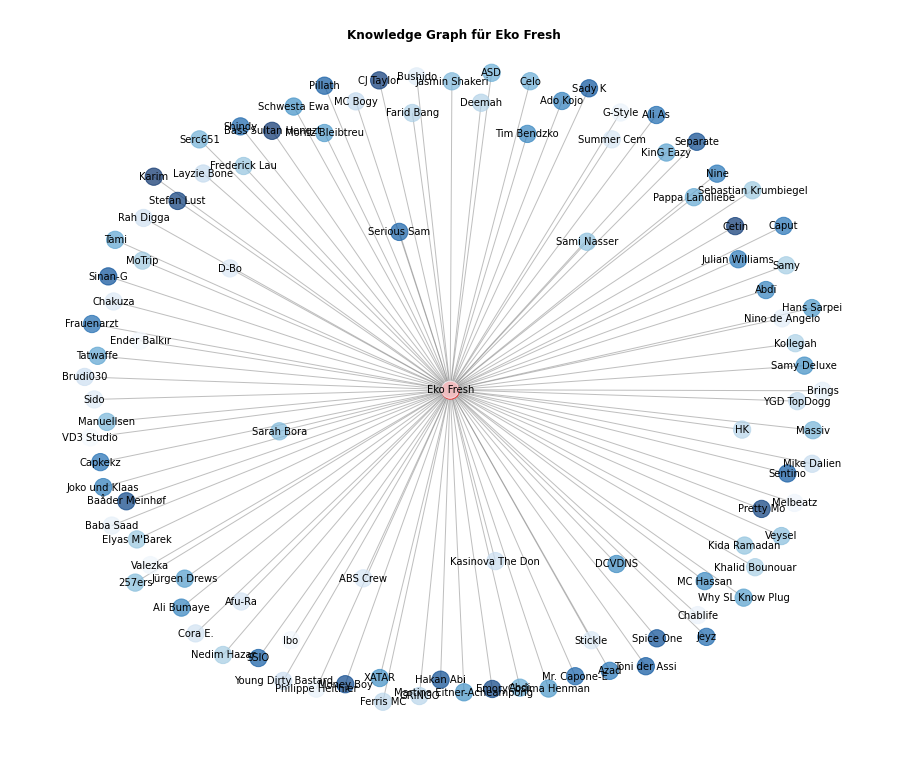

<Figure size 432x288 with 0 Axes>

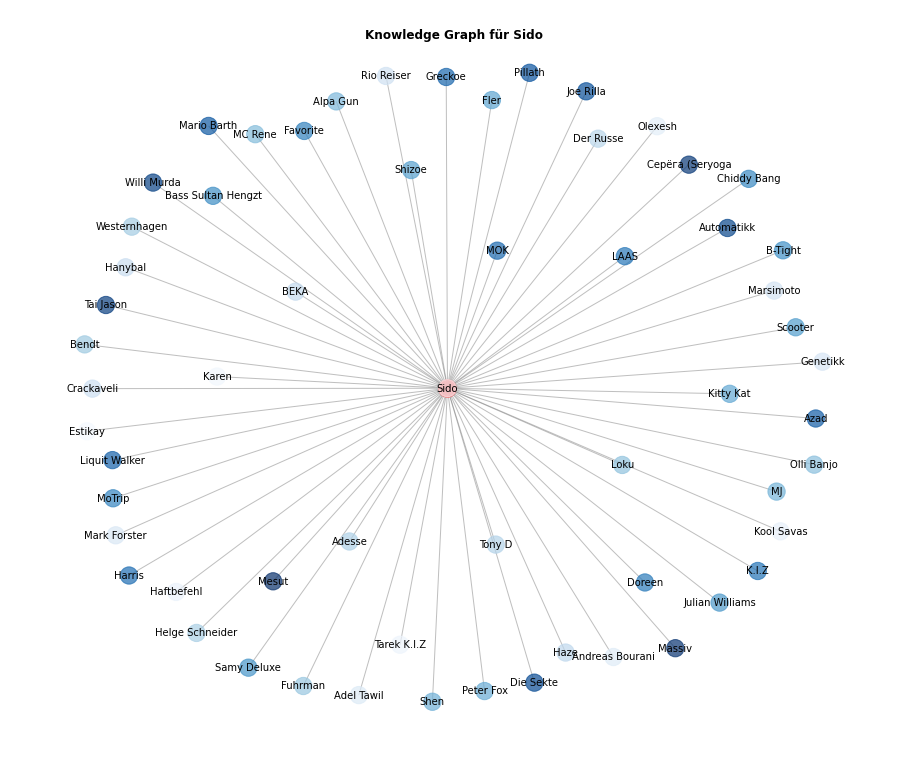

<Figure size 432x288 with 0 Axes>

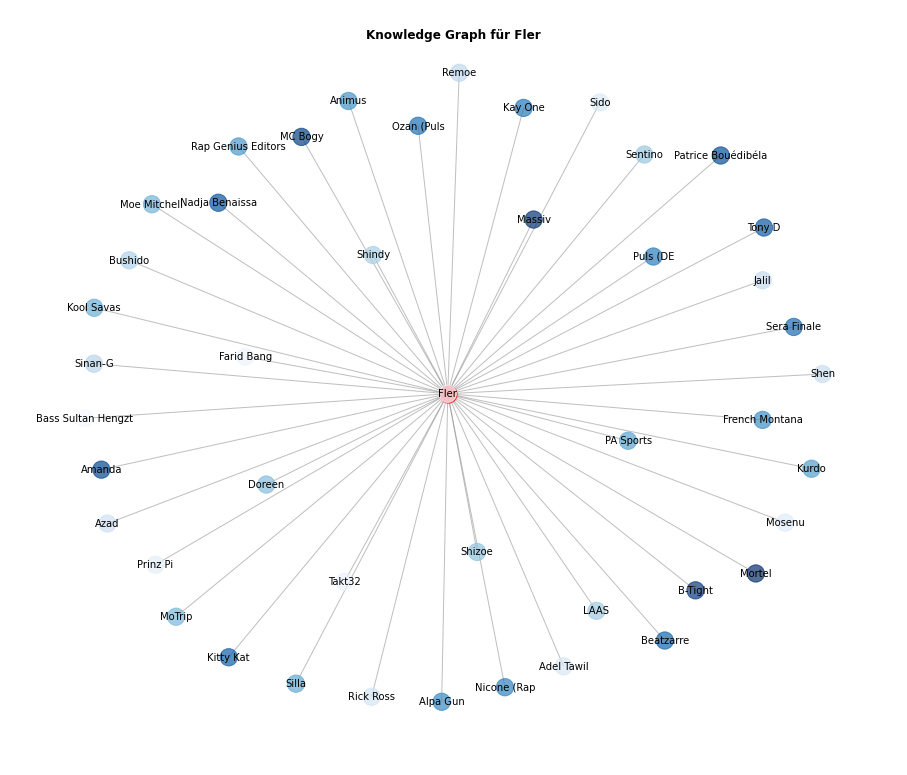

<Figure size 432x288 with 0 Axes>

In [121]:
collabs = colabs[colabs['collaboration_split'].notnull()]

# Top 3 Künstler
top_artists = collabs['artist'].value_counts().nlargest(3).index.tolist()

for i, top_artist in enumerate(top_artists, start=1):
    G = nx.Graph()

    # Künstler als Knoten hinzufügen
    G.add_node(top_artist, label='Künstler')

    # Kollaborateure finden und bearbeiten
    collaborations = collabs.loc[collabs['artist'] == top_artist, 'collaboration_split'].explode().unique()

    for artist in collaborations:
        artist = artist.strip()
        if artist != top_artist:
            G.add_node(artist, label='Künstler')
            G.add_edge(top_artist, artist)

    pos = nx.spring_layout(G, k=1, seed=15)
    
    plt.figure(facecolor='white', figsize=(16, 14))
    
    # Nodes werden erstellt
    artist_nodes = [node for node in G.nodes() if G.nodes[node]['label'] == 'Künstler' ]
    nx.draw_networkx_nodes(G, pos, nodelist=[top_artist], node_color='red', alpha=0.7)

    # Nodes werden je nach Häufigkeit der Kollaboration gefärbt
    # je häufiger., desto dunkler
    nx.draw_networkx_nodes(G, pos, nodelist=artist_nodes, node_color=range(len(artist_nodes)), cmap='Blues', alpha=0.7)

    # Zeichnen der Kanten
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
    nx.draw_networkx_edge_labels(G, pos, font_size=8, font_color='black', edge_labels=nx.get_edge_attributes(G, 'label'))

    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    plt.title(f"Knowledge Graph für {top_artist}", fontweight='bold', y=0.95)
    
    plt.axis('off')
    plt.show()
    graph = os.path.join("..\images", f"{top_artist}_colabs.jpg")
    plt.savefig(graph, dpi=300)